In [1]:
import scripro

In [2]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scanpy as sc
import warnings
warnings.filterwarnings("ignore")

## Load data

In [3]:
rna = sc.read_h5ad("/fs/home/xuyunfan/data/10x/lymph2/rna/rna.h5ad")

In [4]:
rna.var_names_make_unique()

In [5]:
rna

AnnData object with n_obs × n_vars = 14566 × 36621

## Calculate Supercell and markergene

In [6]:
test_data = scripro.Ori_Data(rna,Cell_num=50)

In [7]:
%%time
test_data.get_positive_marker_gene_parallel(cores=4)

CPU times: user 8 s, sys: 15.2 s, total: 23.2 s
Wall time: 31.4 s


In [8]:
rna_seq_data = scripro.SCRIPro_RNA(8,'hg38',test_data,assays=['Direct','DNase','H3K27ac'])

## Calculate the TF activity score

In [9]:
rna_seq_data.cal_ISD_cistrome()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [28:59<00:00,  8.28s/it]


In [10]:
rna_seq_data.get_P_value_matrix()

In [11]:
rna_seq_data.get_chip_matrix()

In [12]:
rna_seq_data.P_value_matrix

factor,E2F1,GATA3,E2F4,MYB,SUPT5H,AFF4,MAF,T,POLR2A,TFDP1,...,RBPJL,BRD9,GRHL1,MAFA,CIC,MBD4,NRL,POU3F1,ZNF654,ESCO2
3_10,1.000000,1.000000,1.000000,1.000000,0.914953,0.882570,0.874345,0.854205,0.830619,0.830266,...,3.416435e-09,3.040265e-09,3.006776e-09,5.297350e-10,1.911846e-10,1.368583e-10,7.805423e-11,4.700290e-11,2.292620e-11,0.000000e+00
6_9,0.164380,1.000000,0.153662,1.000000,0.139917,0.501524,0.596294,1.000000,1.000000,0.217802,...,4.565737e-02,1.386658e-01,3.487509e-03,4.003918e-02,9.023279e-04,1.475038e-02,1.882507e-02,2.377074e-02,3.562044e-04,2.586254e-03
2_24,0.107954,0.416555,0.102516,0.225862,0.000213,0.012008,0.264456,1.000000,0.548496,0.009122,...,2.177995e-01,1.877852e-02,1.812204e-01,2.293108e-01,1.621197e-01,5.376652e-02,1.384409e-01,2.337917e-01,3.117354e-09,1.249464e-03
3_18,1.000000,1.000000,0.971247,1.000000,0.732436,0.824885,0.928428,0.897680,0.846907,0.906373,...,5.603465e-02,1.275197e-04,1.284198e-01,6.931556e-02,6.279574e-02,1.273098e-02,1.065236e-01,9.153367e-02,2.254857e-04,2.426580e-04
0_4,0.045157,1.000000,0.006691,1.000000,0.009383,0.354598,0.427893,0.943251,0.353148,0.042098,...,5.636499e-02,5.224638e-08,1.182692e-01,9.270923e-02,2.965470e-01,1.024289e-02,1.422810e-01,2.313524e-01,8.861440e-10,4.345016e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8_8,0.034536,0.107031,0.052801,0.247152,0.189337,0.038531,0.044300,0.243137,0.516133,0.093225,...,3.847420e-02,2.568304e-02,3.230990e-02,1.151783e-01,1.986901e-02,3.513896e-03,1.814942e-01,1.230744e-01,4.883253e-04,1.140551e-03
5_2,0.130284,1.000000,0.115170,1.000000,0.258530,0.547390,0.934037,1.000000,1.000000,0.112004,...,1.650230e-02,7.248262e-02,5.578678e-02,5.012952e-02,5.327213e-02,3.480175e-02,6.762337e-02,1.448846e-01,2.242229e-02,3.866904e-04
0_12,0.036691,1.000000,0.008126,1.000000,0.089721,0.683768,0.879696,1.000000,0.849084,0.012692,...,4.987552e-03,1.711502e-02,3.231438e-01,1.097280e-02,2.329410e-01,1.341514e-02,1.282526e-01,8.499776e-02,2.984730e-02,1.568336e-02
4_3,0.178370,1.000000,0.141201,1.000000,0.191575,0.448356,0.883929,1.000000,1.000000,0.163009,...,1.261208e-01,1.919768e-03,2.336843e-01,2.006156e-01,1.875034e-01,1.172756e-03,2.377777e-01,3.959996e-02,1.316260e-04,7.573186e-03


In [13]:
%%time
rna_seq_data.get_tf()

CPU times: user 5min 33s, sys: 525 ms, total: 5min 34s
Wall time: 5min 36s


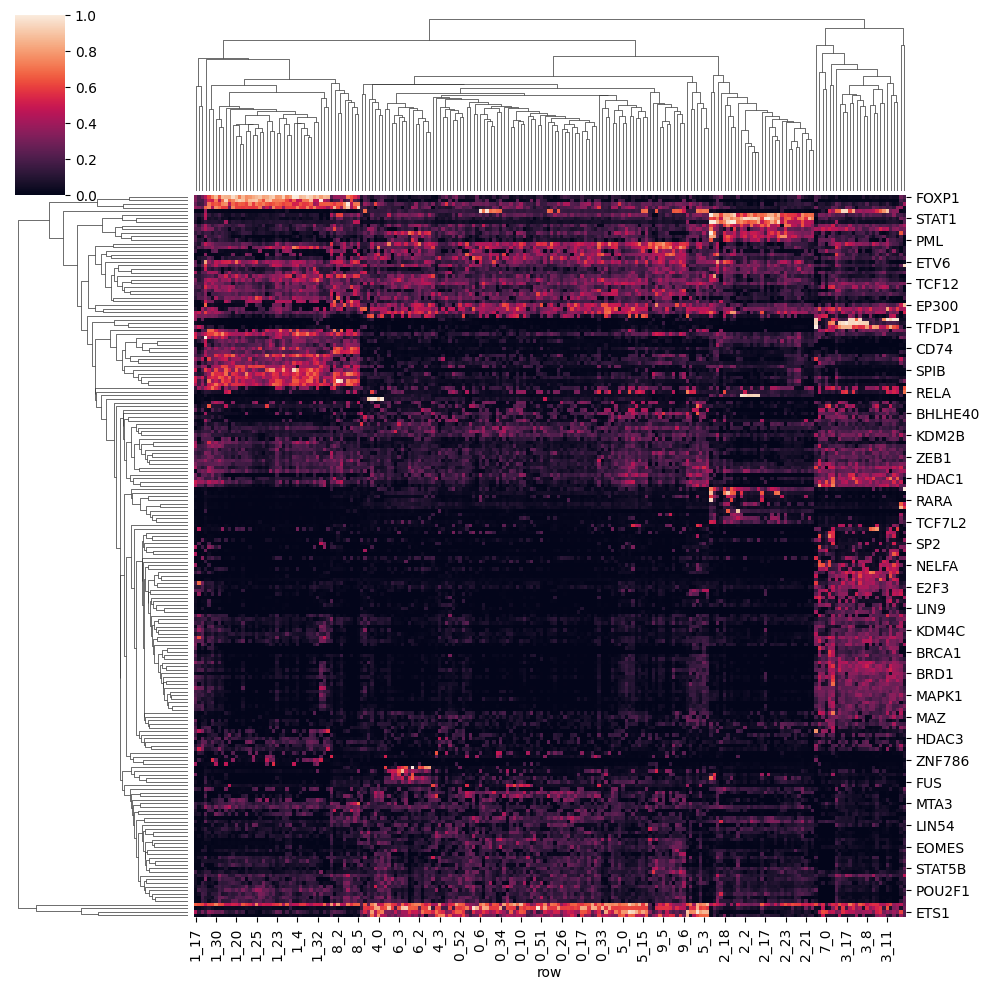

In [14]:
sns.clustermap(rna_seq_data.tf_score.loc[:,rna_seq_data.tf_score.std().sort_values(ascending = False)[0:200].index].T)

In [15]:
rna_seq_data.tf_score

,ADNP,AFF1,AFF4,AGO1,AHR,AIRE,ALX1,ALX3,ALX4,ANHX,...,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN4,ZSCAN5A,ZSCAN5C,ZXDB,ZXDC
row,,,,,,,,,,,,,,,,,,,,,
0_0,8.941848e-09,0.074434,0.118683,0.001752,0.000656,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.001450,0.000071,0.0,0.003017,0.000012,0.0,9.033504e-08,0.000002
0_1,5.961779e-06,0.099676,0.158526,0.003358,0.002175,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.011036,0.000024,0.0,0.003506,0.000023,0.0,9.065280e-09,0.001390
0_10,1.286292e-03,0.077719,0.039434,0.003241,0.002493,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.005785,0.000542,0.0,0.003021,0.000114,0.0,8.517453e-07,0.000122
0_11,1.996435e-06,0.116278,0.248887,0.002287,0.000749,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.012717,0.000078,0.0,0.001877,0.000138,0.0,3.213475e-06,0.004730
0_12,1.051324e-02,0.073261,0.281915,0.000058,0.001033,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000500,0.004075,0.0,0.002596,0.000371,0.0,3.630953e-05,0.001618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9_4,1.161247e-03,0.138205,0.156980,0.012924,0.067427,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.002984,0.000024,0.0,0.002155,0.000929,0.0,1.664833e-04,0.000000
9_5,1.145621e-02,0.092379,0.031361,0.008403,0.014964,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.011867,0.001063,0.0,0.002452,0.000521,0.0,1.479618e-04,0.038287
9_6,4.667501e-03,0.053883,0.096102,0.005362,0.006063,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.009381,0.000382,0.0,0.005113,0.000489,0.0,1.741321e-04,0.032742


In [16]:
all_cell_score = pd.merge(test_data.adata.obs,rna_seq_data.tf_score,left_on='new_leiden',right_index=True).iloc[:,2:]

In [17]:
all_cell_anndata = sc.AnnData(all_cell_score)

In [18]:
tem_anndata = test_data.adata[all_cell_score.index]

In [19]:
all_cell_anndata.obsm = tem_anndata.obsm

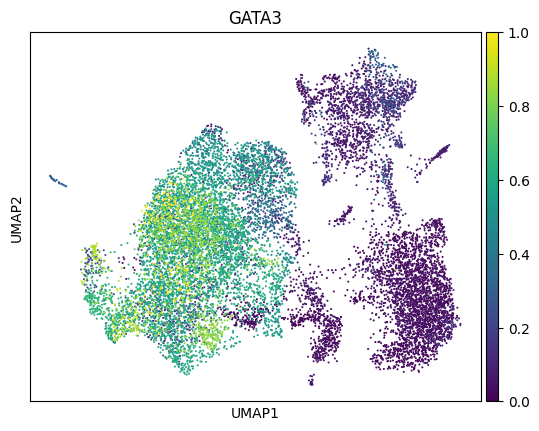

In [20]:
sc.pl.umap(all_cell_anndata,color = 'GATA3')

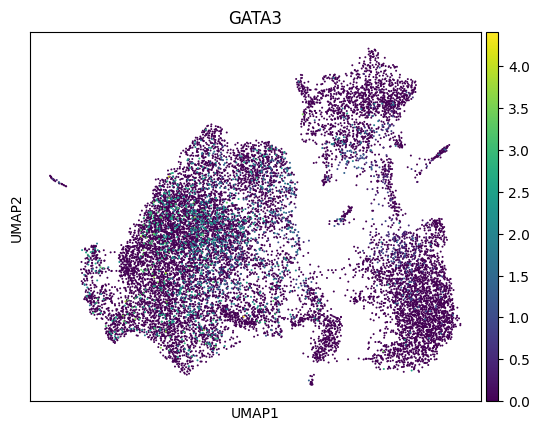

In [21]:
sc.pl.umap(test_data.adata,color = 'GATA3')

In [23]:
rna_seq_data.get_tf_target('GATA3')

,FOSL2,GRK2,CD69,PRDM1,CD226,ATP2B4,PRF1,TBC1D10B,SLAMF7,C12orf57,...,ZDHHC1,GREM2,MEST,ZNF613,SLC49A4,CDCA7L,CSN3,SLC44A5,PATJ,QSOX2
3_10,0.120183,0.000000,0.152205,0.000000,0.055196,0.000000,0.000000,0.000000,0.000000,0.022359,...,0,0,0,0,0,0.0,0,0,0,0
6_9,0.000000,0.014557,0.000000,0.000000,0.000000,0.111044,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0.0,0,0,0,0
2_24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0.0,0,0,0,0
3_18,0.000000,0.025052,0.000000,0.005026,0.000000,0.000000,0.007749,0.002944,0.000000,0.017879,...,0,0,0,0,0,0.0,0,0,0,0
0_4,0.000000,0.000000,0.000000,0.146413,0.044952,0.011492,0.143634,0.000000,0.097054,0.000000,...,0,0,0,0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8_8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0.0,0,0,0,0
5_2,0.052713,0.000019,0.000000,0.000000,0.061286,0.059389,0.044520,0.075121,0.000066,0.078721,...,0,0,0,0,0,0.0,0,0,0,0
0_12,0.000000,0.000000,0.027293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0.0,0,0,0,0
4_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0.0,0,0,0,0
